[ 1.         -1.45238793  0.57747898]
[0.03881145 0.04732422 0.03881145]


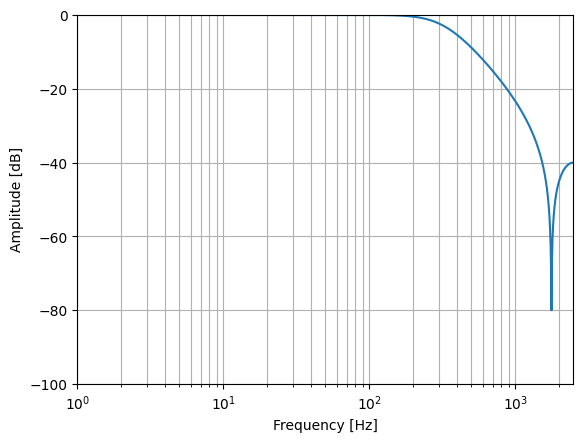

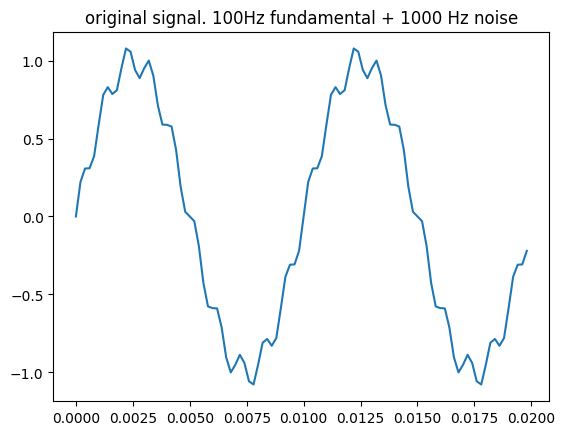

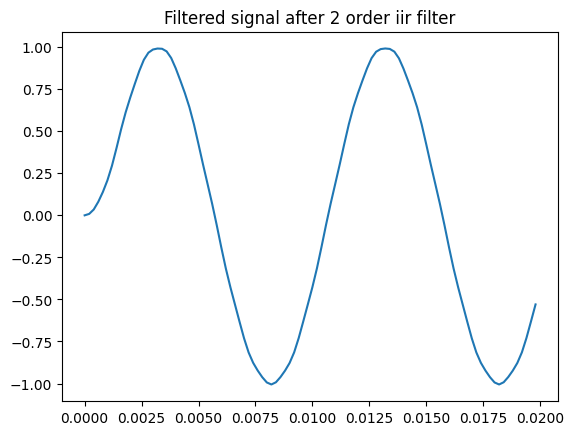

static const struct iir2 f = {
    .a = { -1.4523879349634015, 0.5774789842285108 },
    .b = { 0.038811446233767505, 0.047324223275615813, 0.038811446233767505 },
};
static const struct point test_data[] = {
    { .x =  0.00000000, .y =  0.00000000},
    { .x =  0.22043889, .y =  0.00855555},
    { .x =  0.30746841, .y =  0.03479137},
    { .x =  0.30934603, .y =  0.08070234},
    { .x =  0.38664802, .y =  0.13869904},
    { .x =  0.58778525, .y =  0.20795769},
    { .x =  0.77965276, .y =  0.29502176},
    { .x =  0.82929177, .y =  0.40029012},
    { .x =  0.78554940, .y =  0.51100102},
    { .x =  0.80972140, .y =  0.61180057},
    { .x =  0.95105652, .y =  0.69919904},
    { .x =  1.07739290, .y =  0.78045593},
    { .x =  1.05680525, .y =  0.85866682},
    { .x =  0.93924820, .y =  0.92470168},
    { .x =  0.88718160, .y =  0.96706165},
    { .x =  0.95105652, .y =  0.98590353},
    { .x =  0.99993270, .y =  0.99170626},
    { .x =  0.90310645, .y =  0.99028742},
    { .x =  0.711

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, iirfilter, lfilter

fs = 5000.0 # Sampling frequency in Hz
fc = 100 # The filter cut frequency

nf = fs/2  # nyquist frequency

N = 2 # filter order
Wn = [fc]

b, a = iirfilter(N, Wn, rp=.01, rs=40, btype='lowpass', analog=False, ftype='ellip', fs = fs)

print(a)
print(b)


w, h = freqz(b, a, fs=fs)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-4)))
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((1, 2500, -100, .1))
ax.grid(which='both', axis='both')
plt.show()

# Create test vector from a sample signal
t = np.arange(0, .02, 1/fs)
x = np.sin(2 * np.pi * 100 * t) + .1 * np.sin(2 * np.pi * 1000 * t)

plt.plot(t, x)
plt.title("original signal. 100Hz fundamental + 1000 Hz noise")
plt.show()

# apply the filter
y = lfilter(b, a, x)
plt.plot(t, y)
plt.title("Filtered signal after 2 order iir filter")
plt.show()

# create a test vector for unit testing
# generate test for copy paste

print("static const struct iir2 f = {")
print("    .a = {{ {}, {} }},".format(a[1]/a[0], a[2]/a[0]))
print("    .b = {{ {}, {}, {} }},".format(b[0], b[1], b[2]))
print("};")

print("static const struct point test_data[] = {")
for i, j in zip(x, y):
    print("    {{ .x = {: .08f}, .y = {: .08f}}},".format(i, j))
print("};")